In [1]:
## SEALED ##

#: Imports
import mysql.connector

import sys
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:

#: Create the connection
cnx = mysql.connector.connect(user='root', password='Salam123', host='localhost', database='classicmodels')

#: Create the cursor
mycursor = cnx.cursor()

# method: rowToDict
# Transforms the sql result row to dictionary
# @row, tuple: The input value tuple
# @names, list: The list of names
# @return, dict: The dictionary
# @completed


In [3]:
def rowToDict( row: tuple, names: list ) -> dict:
	#: Declare variables
	output = {}
	index = 0
	#: Loop for each
	for n in names:
		#: Read the value
		output[n] = row[index]
		index += 1
	#: Return the output
	return output

In [4]:
# method: dbExecute
# Executes a statement
# @sql, str: The execution statement
# @params, tuple: Arguments
# @completed 
# def dbExecute( sql: str, params: tuple ):
# 	mycursor.execute( sql, params )

#* insert
#* delete
#* update
def dbExecute( sql: str):
	mycursor.execute( sql )
	# cnx.commit() # her işlemden sonra gerek yok bir kaç execute sonrası kullanabiliriz en son koy
	
	return int(mycursor.rowcount)
def dbCommit():
	cnx.commit()
	# print(mycursor.rowcount, "record efected.")
	

In [5]:
# method: dbInsert
# Executes an insert statement
# @sql, str: The execution statement
# @params, tuple: Arguments
# @return, int: The row id
# @completed 
def dbInsert(sql):#, params: tuple ) -> int:
	mycursor.execute( sql)#, params )
	return int(mycursor.lastrowid)



In [6]:
# method: dbSelect
# Executes a statement for selecting
# @sql, str: The execution statement
# @params, tuple: Arguments
# @return: Output
# @completed
def dbSelect( sql: str):
	mycursor.execute( sql )
	myresult = mycursor.fetchall()
	return myresult#, [i[0] for i in mycursor.description] <- column names



In [7]:
a = dbSelect("select c.customerName, concat(c.contactLastName, ' ', c.contactFirstName) ContactFullName, c.phone, concat(c.country, ' ' , c.city, ' ' , c.addressLine1) ContactAddress,c.creditLimit, p.productName, c.salesRepEmployeeNumber, p.buyPrice, p.quantityInStock, p.MSRP , q.amount, q.paymentDate, od.priceEach, od.quantityOrdered, od.orderLineNumber from classicmodels.orderdetails od  left join classicmodels.products p on od.productCode = p.productCode left join classicmodels.orders o  on od.orderNumber = o.orderNumber left join classicmodels.customers c  on o.customerNumber = c.customerNumber  left join classicmodels.payments q on  c.customerNumber = q.customerNumber")


data = pd.DataFrame(a ,columns=['customerName', 'CustomerFullName','phone','CustomerAddress','creditLimit', 'productName','salesRepEmployeeNumber', 'buyPrice', 'quantityInStock', 'MSRP', 'amount', 'paymentDate', 'priceEach', 'quantityOrdered', 'orderLineNumber'])
#print(dataB)


In [8]:


v = dbSelect("select employeeNumber, lastName, firstName, extension, email, concat(o.country, ', ', o.city, ', ', o.addressLine1, ' ' ,o.territory) office_location, phone,jobTitle from classicmodels.employees e left join classicmodels.offices o  on e.officeCode = o.officeCode;")


da = pd.DataFrame(v ,columns=['employeeNumber', 'lastName', 'firstName', 'extension', 'email','office_location','phone','jobTitle'])
#print(dataB)

In [24]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
salesRepEmployeeNumber,12015.0,1371.124594,148.867417,1165.0,1286.0,1370.0,1501.0,1702.0
quantityInStock,12015.0,5040.524761,2907.560501,15.0,2378.0,5330.0,7689.0,9997.0
quantityOrdered,12015.0,35.367873,9.653278,6.0,27.0,35.0,43.0,97.0
orderLineNumber,12015.0,6.499625,4.215497,1.0,3.0,6.0,9.0,18.0


In [25]:
da

,employeeNumber,lastName,firstName,extension,email,office_location,phone,jobTitle
0,1002,Murphy,Diane,x5800,dmurphy@classicmodelcars.com,"USA, San Francisco, 100 Market Street NA",+1 650 219 4782,President
1,1056,Patterson,Mary,x4611,mpatterso@classicmodelcars.com,"USA, San Francisco, 100 Market Street NA",+1 650 219 4782,VP Sales
2,1076,Firrelli,Jeff,x9273,jfirrelli@classicmodelcars.com,"USA, San Francisco, 100 Market Street NA",+1 650 219 4782,VP Marketing
3,1088,Patterson,William,x4871,wpatterson@classicmodelcars.com,"Australia, Sydney, 5-11 Wentworth Avenue APAC",+61 2 9264 2451,Sales Manager (APAC)
4,1102,Bondur,Gerard,x5408,gbondur@classicmodelcars.com,"France, Paris, 43 Rue Jouffroy D'abbans EMEA",+33 14 723 4404,Sale Manager (EMEA)
5,1143,Bow,Anthony,x5428,abow@classicmodelcars.com,"USA, San Francisco, 100 Market Street NA",+1 650 219 4782,Sales Manager (NA)
6,1165,Jennings,Leslie,x3291,ljennings@classicmodelcars.com,"USA, San Francisco, 100 Market Street NA",+1 650 219 4782,Sales Rep
7,1166,Thompson,Leslie,x4065,lthompson@classicmodelcars.com,"USA, San Francisco, 100 Market Street NA",+1 650 219 4782,Sales Rep
8,1188,Firrelli,Julie,x2173,jfirrelli@classicmodelcars.com,"USA, Boston, 1550 Court Place NA",+1 215 837 0825,Sales Rep
9,1216,Patterson,Steve,x4334,spatterson@classicmodelcars.com,"USA, Boston, 1550 Court Place NA",+1 215 837 0825,Sales Rep


In [10]:
da['jobTitle'].value_counts().index

Index(['Sales Rep', 'President', 'VP Sales', 'VP Marketing',
       'Sales Manager (APAC)', 'Sale Manager (EMEA)', 'Sales Manager (NA)'],
      dtype='object')

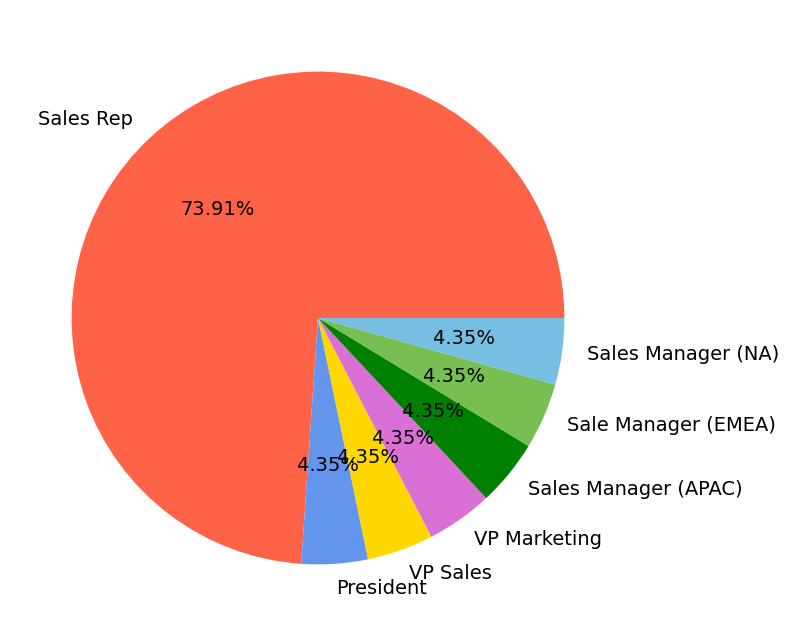

In [11]:
plt.figure(figsize=(8,8))
plt.pie(
    x=da['jobTitle'].value_counts().values, 
    labels=da['jobTitle'].value_counts().index,
    autopct='%1.2f%%',
    textprops={'fontsize':14},
    colors=[
        # matplotlib named colors 
        'tomato', 'cornflowerblue', 'gold', 'orchid', 'green', "#77BF52",
        # any color using the color codes
        "#77BFE2"]
)
plt.show()

In [12]:
data.head()

,customerName,CustomerFullName,phone,CustomerAddress,creditLimit,productName,salesRepEmployeeNumber,buyPrice,quantityInStock,MSRP,amount,paymentDate,priceEach,quantityOrdered,orderLineNumber
0,Online Diecast Creations Co.,Young Dorothy,6035558647,USA Nashua 2304 Long Airport Avenue,114200.00,1917 Grand Touring Sedan,1216,86.70,2724,170.00,50799.69,2004-11-17,136.00,30,3
1,Online Diecast Creations Co.,Young Dorothy,6035558647,USA Nashua 2304 Long Airport Avenue,114200.00,1917 Grand Touring Sedan,1216,86.70,2724,170.00,10223.83,2003-01-16,136.00,30,3
2,Online Diecast Creations Co.,Young Dorothy,6035558647,USA Nashua 2304 Long Airport Avenue,114200.00,1917 Grand Touring Sedan,1216,86.70,2724,170.00,55425.77,2003-12-05,136.00,30,3
3,Online Diecast Creations Co.,Young Dorothy,6035558647,USA Nashua 2304 Long Airport Avenue,114200.00,1911 Ford Town Car,1216,33.30,540,60.54,50799.69,2004-11-17,55.09,50,2
4,Online Diecast Creations Co.,Young Dorothy,6035558647,USA Nashua 2304 Long Airport Avenue,114200.00,1911 Ford Town Car,1216,33.30,540,60.54,10223.83,2003-01-16,55.09,50,2


In [13]:
b = dbSelect("SELECT country, COUNT(DISTINCT customerNumber) AS total_customers FROM customers  GROUP BY country  ORDER BY total_customers DESC;")
Data = pd.DataFrame(b ,columns=['country','total_customers'])
Data

,country,total_customers
0,USA,36
1,Germany,13
2,France,12
3,Spain,7
4,Australia,5
5,UK,5
6,Italy,4
7,New Zealand,4
8,Canada,3
9,Finland,3


<AxesSubplot:xlabel='total_customers', ylabel='country'>

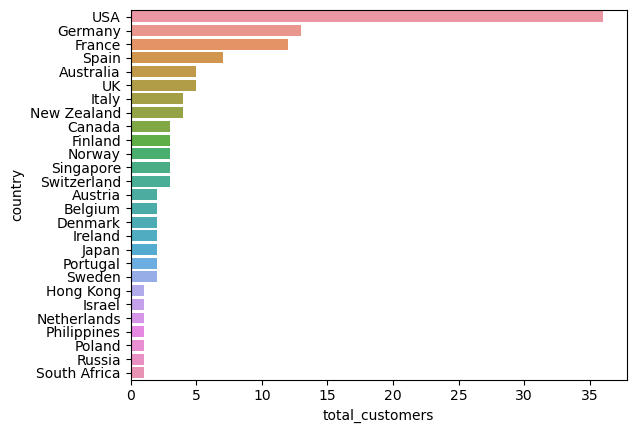

In [14]:
sns.barplot(data=Data,  x="total_customers", y="country")

In [15]:
data.info()
9

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12015 entries, 0 to 12014
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   customerName            12015 non-null  object
 1   CustomerFullName        12015 non-null  object
 2   phone                   12015 non-null  object
 3   CustomerAddress         12015 non-null  object
 4   creditLimit             12015 non-null  object
 5   productName             12015 non-null  object
 6   salesRepEmployeeNumber  12015 non-null  int64 
 7   buyPrice                12015 non-null  object
 8   quantityInStock         12015 non-null  int64 
 9   MSRP                    12015 non-null  object
 10  amount                  12015 non-null  object
 11  paymentDate             12015 non-null  object
 12  priceEach               12015 non-null  object
 13  quantityOrdered         12015 non-null  int64 
 14  orderLineNumber         12015 non-null  int64 
dtypes:

9

In [16]:
df = data.astype({"amount":'int32', "MSRP":'int64',"creditLimit":'int32', "priceEach":'int32', "buyPrice":'int32'})

In [17]:

Df= df.select_dtypes(exclude= object)

In [18]:
ln=df[['MSRP','amount','priceEach','quantityOrdered','orderLineNumber']]

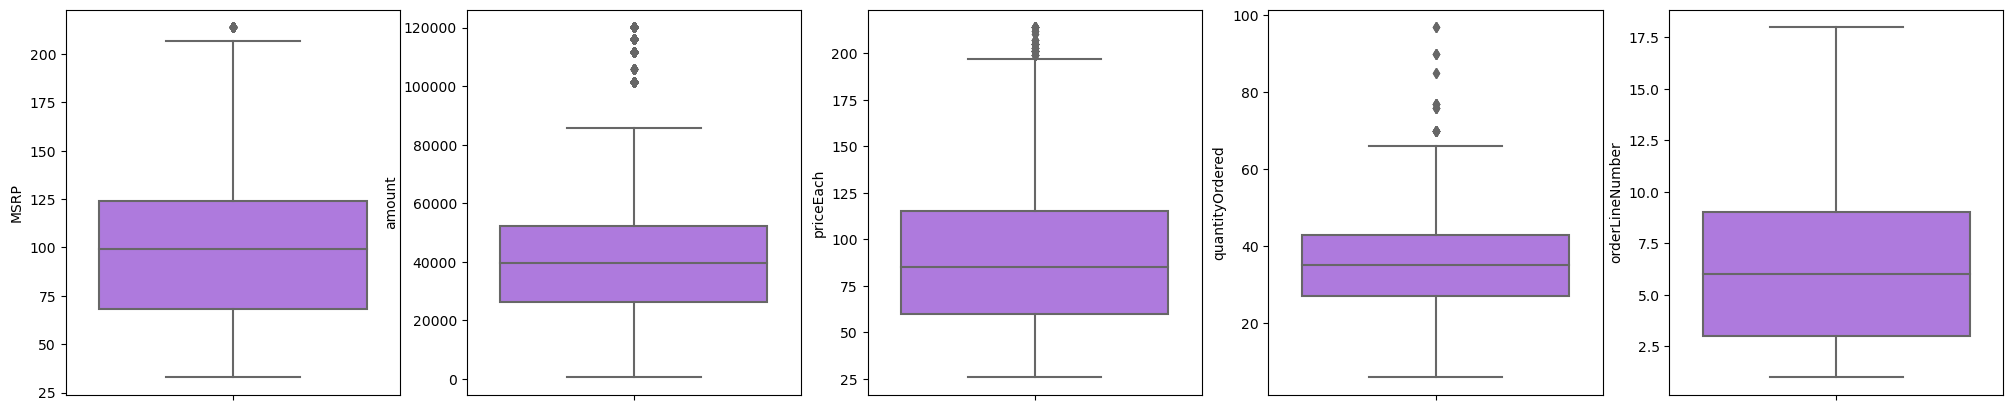

In [19]:

columns_name=ln.columns
colors = [ '#AF69ED']
fig,axes=plt.subplots(1, 5,figsize=(25,5))
for i in range (len(columns_name)):
    sns.boxplot(ax=axes[i],y=columns_name[i],data=ln,palette=colors)
    
    


In [20]:
datacolumn = ln[['MSRP','amount','priceEach','quantityOrdered']]

In [21]:
def outlier_treatment(datacolumn):
 sorted(datacolumn)
 Q1,Q3 = np.percentile(datacolumn , [25,75])
 IQR = Q3 - Q1
 lower_range = Q1 - (1.5 * IQR)
 upper_range = Q3 + (1.5 * IQR)
 return lower_range,upper_range

In [22]:
for col in ln.columns:
    lowerbound,upperbound=outlier_treatment(ln[col])
    ln[col]=np.clip(ln[col],a_min=lowerbound,a_max=upperbound)

C:\Users\Mazi\AppData\Local\Temp\ipykernel_43084\1486685936.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ln[col]=np.clip(ln[col],a_min=lowerbound,a_max=upperbound)


NameError: name 'DMC' is not defined

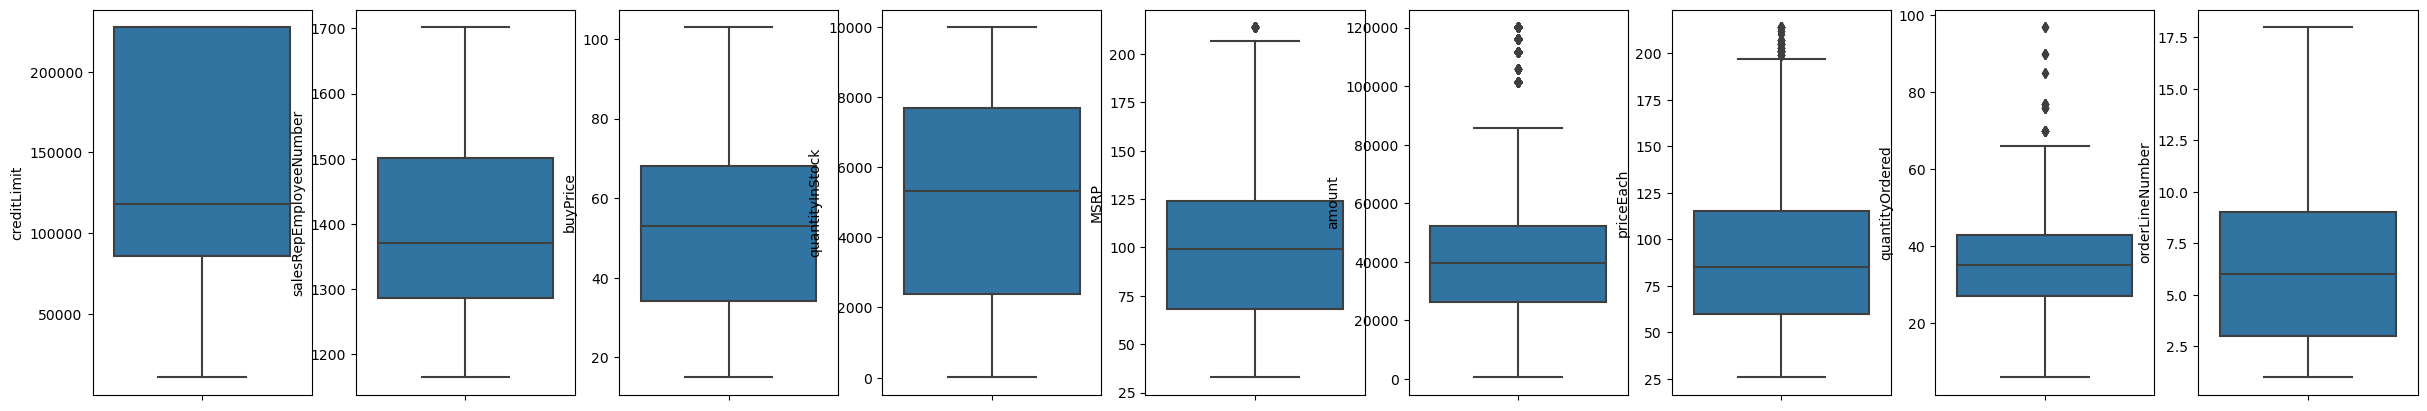

In [23]:

columns_name=Df.columns
fig,axes=plt.subplots(1, 9,figsize=(30,5))
for i in range (len(columns_name)):
    sns.boxplot(ax=axes[i],y=columns_name[i],data=Df)
    
    
    

colors = ['#78C850', '#F08030', '#6890F0','#F8D030', '#F85888', '#705898', '#98D8D8']
sns.boxplot(x=DMC, y=day, palette=colors)
plt.show()

C:\Users\Mazi\AppData\Local\Temp\ipykernel_35244\2665595949.py:2: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



Text(0.5, 1.0, 'Correlation Heatmap')

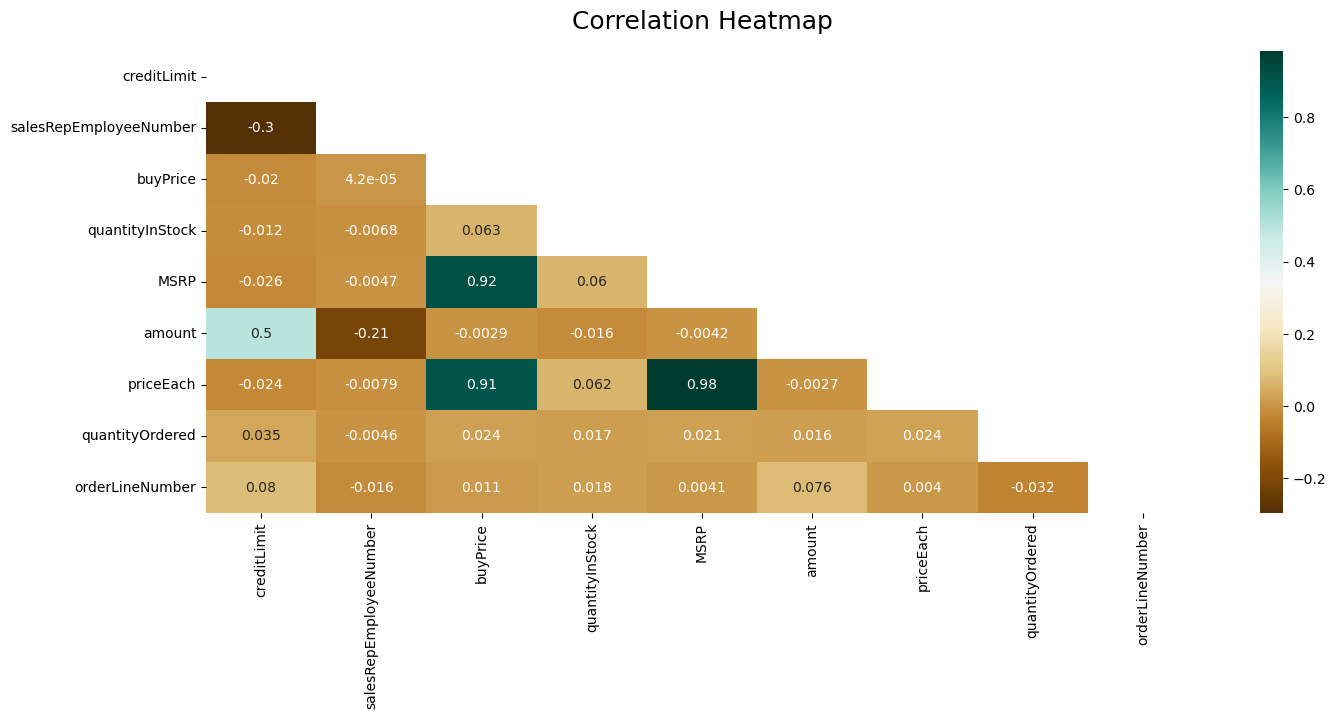

In [ ]:
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sns.heatmap(Df.corr(), mask=mask,  annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=16)

In [ ]:
Df.describe().T

,count,mean,std,min,25%,50%,75%,max
creditLimit,12015.0,145547.881814,67339.692953,11000.0,85800.0,118200.0,227600.0,227600.0
salesRepEmployeeNumber,12015.0,1371.124594,148.867417,1165.0,1286.0,1370.0,1501.0,1702.0
buyPrice,12015.0,53.952143,22.246499,15.0,34.0,53.0,68.0,103.0
quantityInStock,12015.0,5040.524761,2907.560501,15.0,2378.0,5330.0,7689.0,9997.0
MSRP,12015.0,100.141240,40.149325,33.0,68.0,99.0,124.0,208.0
amount,12015.0,41991.278236,23144.987074,615.0,26155.0,39580.0,52151.0,91145.0
priceEach,12015.0,89.962131,36.625207,26.0,60.0,85.0,115.0,197.5
quantityOrdered,12015.0,35.336995,9.522644,6.0,27.0,35.0,43.0,67.0
orderLineNumber,12015.0,6.499625,4.215497,1.0,3.0,6.0,9.0,18.0


In [ ]:
import plotly.express as px

fig = px.parallel_coordinates(Df, color='MSRP',
                              dimensions=['creditLimit',  'buyPrice', 'quantityInStock', 'MSRP',  'priceEach' ],
                              color_continuous_scale=px.colors.diverging.Spectral_r,
                              color_continuous_midpoint=2)
fig.show()


In [ ]:
df.head()

,customerName,CustomerFullName,phone,CustomerAddress,creditLimit,productName,salesRepEmployeeNumber,orderDate,buyPrice,quantityInStock,MSRP,amount,paymentDate,priceEach,quantityOrdered,orderLineNumber
0,Online Diecast Creations Co.,Young Dorothy,6035558647,USA Nashua 2304 Long Airport Avenue,114200,1917 Grand Touring Sedan,1216,2003-01-06,86,2724,170,50799,2004-11-17,136,30,3
1,Online Diecast Creations Co.,Young Dorothy,6035558647,USA Nashua 2304 Long Airport Avenue,114200,1917 Grand Touring Sedan,1216,2003-01-06,86,2724,170,10223,2003-01-16,136,30,3
2,Online Diecast Creations Co.,Young Dorothy,6035558647,USA Nashua 2304 Long Airport Avenue,114200,1917 Grand Touring Sedan,1216,2003-01-06,86,2724,170,55425,2003-12-05,136,30,3
3,Online Diecast Creations Co.,Young Dorothy,6035558647,USA Nashua 2304 Long Airport Avenue,114200,1911 Ford Town Car,1216,2003-01-06,33,540,60,50799,2004-11-17,55,50,2
4,Online Diecast Creations Co.,Young Dorothy,6035558647,USA Nashua 2304 Long Airport Avenue,114200,1911 Ford Town Car,1216,2003-01-06,33,540,60,10223,2003-01-16,55,50,2
